In [1]:
from matplotlib import pyplot as plt
from parse_logs import parse_siege_logs, read_log_file
from typing import List

In [6]:
def plot_results(results: List, title: str):
    c_values = [res['c'] for res in results]
    response_times = [res['response_time'] for res in results]
    throughputs = [res['throughput'] for res in results]
    percent_failed_transactions = [res['failed_transactions'] * 100/(res['transactions']+res['failed_transactions']) for res in results]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharex=True)

    # Plot response time on the left
    ax1.plot(c_values, response_times, 'b-o', label='Response Time')
    ax1.set_title('Client requests/second vs Response Time')
    ax1.set_xlabel('Client requests/second')
    ax1.set_ylabel('Response Time (s)')
    ax1.legend()
    ax1.grid()

    # Plot throughput in the middle
    ax2.plot(c_values, throughputs, 'g-o', label='Throughput')
    ax2.set_title('Client requests/second vs Throughput')
    ax2.set_xlabel('Client requests/second')
    ax2.set_ylabel('Throughput (MB/s)')
    ax2.legend()
    ax2.grid()

    # Plot throughput on the right
    ax3.plot(c_values, percent_failed_transactions, 'r-o', label='Failed Transactions (%)')
    ax3.set_title('Client requests/second vs Failed transactions')
    ax3.set_xlabel('Client requests/second')
    ax3.set_ylabel('Failed transactions (%)')
    ax3.legend()
    ax3.grid()

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

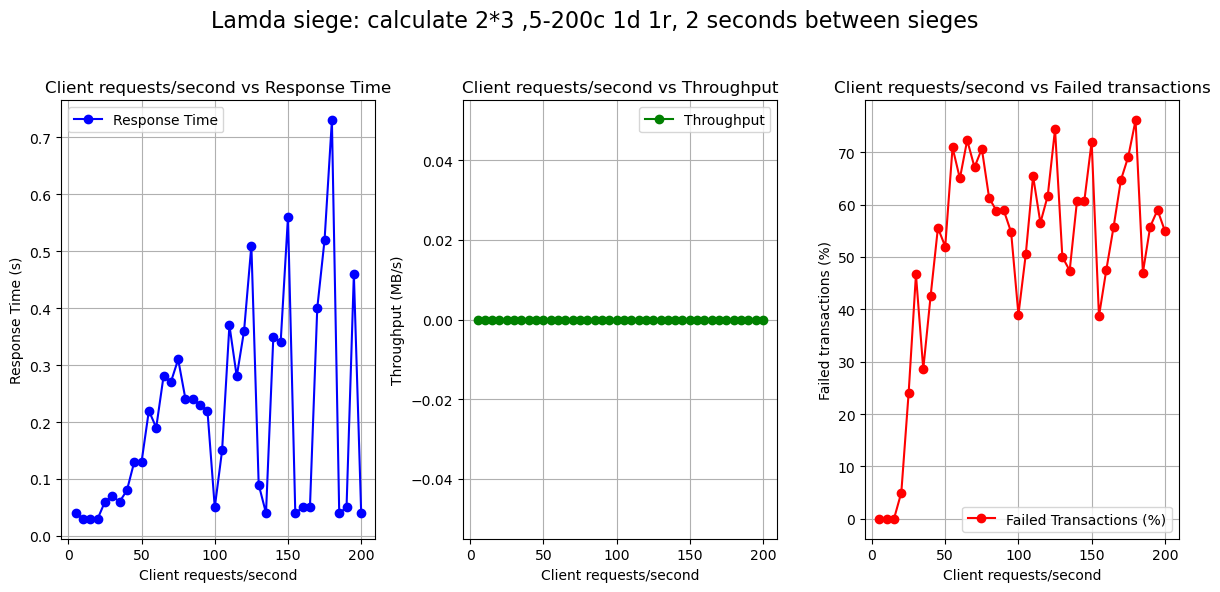

In [8]:
log_file_path = './logs/session1/siege-2s-d1-r1-easy.log'
log_data = read_log_file(log_file_path)
results = parse_siege_logs(log_data)
plot_results(results, 'Lamda siege: calculate 2*3 ,5-200c 1d 1r, 2 seconds between sieges')

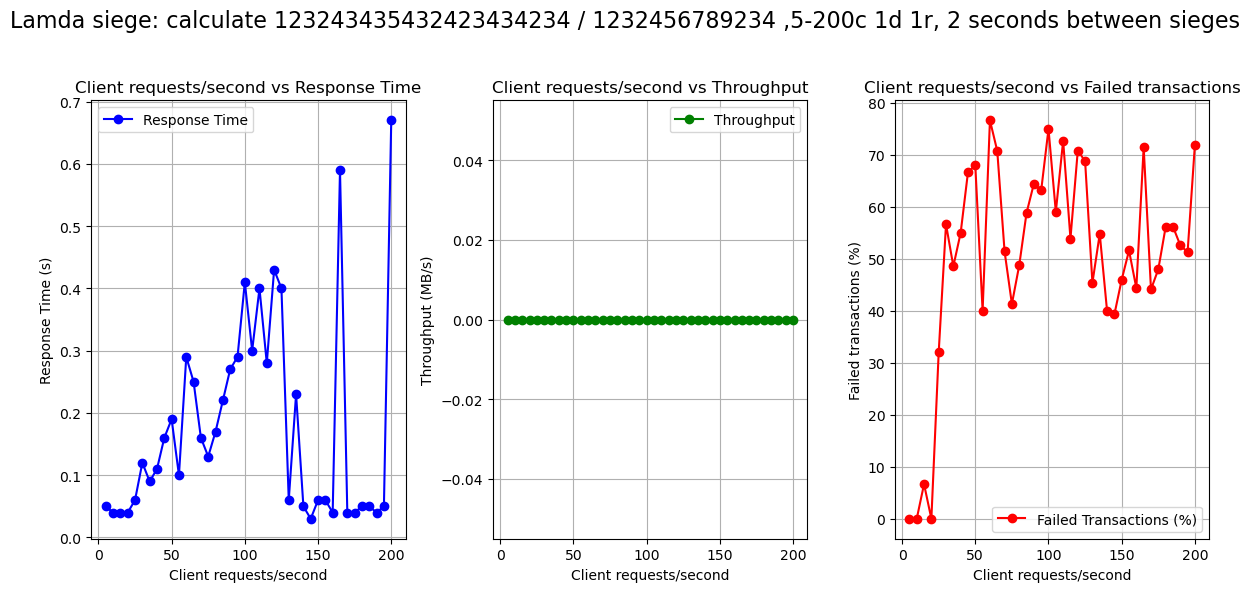

In [9]:
log_file_path = './logs/session1/siege-2s-d1-r1-hard.log'
log_data = read_log_file(log_file_path)
results = parse_siege_logs(log_data)
plot_results(results, 'Lamda siege: calculate 123243435432423434234 / 1232456789234 ,5-200c 1d 1r, 2 seconds between sieges')